In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# wrangling
import pandas as pd
import numpy as np

# preparing
from sklearn.model_selection import train_test_split

# visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# exploring
import scipy.stats as stats
import pandas_profiling

# modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression
from math import sqrt

# 3D projection
from mpl_toolkits.mplot3d import Axes3D

pd.options.display.float_format = '{:20,.2f}'.format

# my modules
import acquire
import summarize
import prepare

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

### Acquire df

- Query brought in 52,169

In [2]:
df = acquire.get_zillow_data()

In [3]:
df.shape

(52169, 72)

- $H_0$: The Null Hypothesis is that the numeric values from the Zillow data do not predict the logerror.

- $H_a$: The Null Hypothesis is that the numeric values from the Zillow data do not predict the logerror.

### Summarize df

In [5]:
summarize.df_summary(df)

--- Shape: (52169, 72)
--- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52169 entries, 0 to 52168
Data columns (total 72 columns):
county                          52169 non-null object
tax_rate                        52164 non-null float64
id                              52169 non-null int64
parcelid                        52169 non-null int64
airconditioningtypeid           13605 non-null float64
airconditioningdesc             13605 non-null object
architecturalstyletypeid        70 non-null float64
architecturalstyledesc          70 non-null object
basementsqft                    47 non-null float64
bathroomcnt                     52169 non-null float64
bedroomcnt                      52169 non-null float64
buildingclasstypeid             0 non-null object
buildingclassdesc               0 non-null object
buildingqualitytypeid           33628 non-null float64
calculatedbathnbr               52153 non-null float64
calculatedfinishedsquarefeet    52161 non-null float64
deckt

   num_cols_missing    pct_cols_missing  num_rows
0                23  31.944444444444443         2
1                24   33.33333333333333        12
2                25   34.72222222222222        11
3                26   36.11111111111111        30
4                27                37.5       177
5                28   38.88888888888889       389
6                29   40.27777777777778      2527
7                30   41.66666666666667      2194
8                31   43.05555555555556      5986
9                32   44.44444444444444      8880
10               33   45.83333333333333     11960
11               34   47.22222222222222     11151
12               35   48.61111111111111      3459
13               36                50.0      4121
14               37  51.388888888888886      1016
15               38   52.77777777777778       214
16               39  54.166666666666664        22
17               40   55.55555555555556        13
18               41   56.94444444444444         3


- Here I use a function that takes in a dataframe of observations and attributes and returns a df where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [6]:
summarize.nulls_by_col(df)

,num_rows_missing,pct_rows_missing
county,0,0.00
tax_rate,5,0.00
id,0,0.00
parcelid,0,0.00
airconditioningtypeid,38564,0.74
airconditioningdesc,38564,0.74
architecturalstyletypeid,52099,1.00
architecturalstyledesc,52099,1.00
basementsqft,52122,1.00
bathroomcnt,0,0.00


#### Takeaways from nulls in columns function

- I can see that there are columns that have no data in them, and those I will certainly drop. 


- There are others that are more than 50% NULL values, and I'm going to drop those as well. That is too high of a percentage of Nulls to make the data meaningful.

- Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [7]:
summarize.nulls_by_row(df)

,num_cols_missing,pct_cols_missing,num_rows
0,23,31.944444444444443,2
1,24,33.33333333333333,12
2,25,34.72222222222222,11
3,26,36.11111111111111,30
4,27,37.5,177
5,28,38.88888888888889,389
6,29,40.27777777777778,2527
7,30,41.66666666666667,2194
8,31,43.05555555555556,5986
9,32,44.44444444444444,8880


#### Takeaways from the nulls by row function

- For my first iteration of the pipeline, I'm going to drop any rows that have missing values. 


- I will go back and add back and possibly impute values after my first iteration.

- This function will drop columns that are not 50% non-missing values and rows that are not 75% non-missing values

In [8]:
df = prepare.handle_missing_values(df)

In [9]:
df.isnull().sum()

county                              0
tax_rate                            5
id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           18541
calculatedbathnbr                  16
calculatedfinishedsquarefeet        8
finishedsquarefeet12              166
fips                                0
state                               0
fullbathcnt                        16
heatingorsystemtypeid           18345
heatingorsystemdesc             18345
latitude                            0
longitude                           0
lotsizesquarefeet                 354
propertycountylandusecode           0
propertylandusetypeid               0
propertylandusedesc                 0
propertyzoningdesc              18479
rawcensustractandblock              0
regionidcity                     1028
regionidcounty                      0
regionidzip                        23
roomcnt     

- I am removing columns for the following reasons...

    - "unitcnt", "propertyzoningdesc", "heatingorsystemdesc", 
      "heatingorsystemtypeid", "buildingqualitytypeid" : missing 18,451 values
    
    - "assessmentyear": constant value of 2016
    
    - "calculatedbathnbr": has a correlation of 1.0 with bathroomcnt
    
    - "finishedsquarefeet12": has a correlcation of 1.0 with calculatedsquarefeet
    
    - "propertylandusedesc", "propertylandusetypeid": these are all "261" or single family residential.
    
    - "rawcensustractandblack": is highly correlated with fips/county
    
    - "state": are all California; not useful in analysis
    
    - "regionidcity": is represented by zipcodes
    
    - "roomcnt": over 36,000 values are 0 rooms
    
    - "parcelid": this is not needed beyond joining tables

In [10]:
cols_to_remove = ["unitcnt", "propertyzoningdesc", "heatingorsystemdesc", 
                  "heatingorsystemtypeid", "buildingqualitytypeid", "assessmentyear",
                  "calculatedbathnbr", "finishedsquarefeet12", "propertylandusedesc", 
                  "propertylandusetypeid", "rawcensustractandblock", "censustractandblock" , "regionidcity",
                  "state", "id", "fullbathcnt", "roomcnt", "parcelid"]

- This function removes the columns above from the dataframe for the reasons I listed above.

In [11]:
df = prepare.remove_columns(df, cols_to_remove)

- Drop rows with missing values using a df.dropna(), so I can run through my first iteration of exploration with visuals using numeric or categorical data types without any missing values. 


- I may decide later to impute values and save rows for the following columns.


    - "tax_rate": has five rows with missing values in tax_rate

    - "yearbuilt": has 40 missing values that I can't impute in a meaningful way. Dropping 40 rows out of the df should not be a problem.
    
    - "censustractandblock": has 112 values I can't impute in a meaningful way. I'll drop these rows.
    
    - "lotsizesquarefeet": 
    
    - "regionidcity":
    
    - "regionidzip":
    
    - "taxvaluedollarcnt":
    
    - "yearbuilt":
    
    - "structuretaxvaluedollarcnt":
    
    - "landtaxvaluedollarcnt":
    
    - "taxamount":

- Now I will drop remaining rows with missing values to get to a df that I can use to run a LR and DT baseline model

In [12]:
df.dropna(inplace=True)

- Verify there are no more missing values in my dataframe.


    - I'll be ready for visual exploration and transforming data types.

In [13]:
df.isnull().sum()

county                          0
tax_rate                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
regionidcounty                  0
regionidzip                     0
taxvaluedollarcnt               0
yearbuilt                       0
structuretaxvaluedollarcnt      0
landtaxvaluedollarcnt           0
taxamount                       0
transactiondate                 0
logerror                        0
transactions                    0
dtype: int64

- I have 51, 657 rows and 26 columns remaining in my df, and now I will deal with data types to get to a df of numeric values only.

In [14]:
df.shape

(51706, 20)

In [15]:
df.dtypes

county                           object
tax_rate                        float64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fips                            float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
regionidcounty                  float64
regionidzip                     float64
taxvaluedollarcnt               float64
yearbuilt                       float64
structuretaxvaluedollarcnt      float64
landtaxvaluedollarcnt           float64
taxamount                       float64
transactiondate                  object
logerror                        float64
transactions                      int64
dtype: object

- For the first iteration, I'm including transactiondate in column conversion to category. If I need to convert it to a datetime later, I will come back and run this.


- Later, I may decide to convert transactiondate column to data type datetime using the code below.

- Convert the following columns to category data types using a function.

In [16]:
cols = ["county", "transactiondate",  "fips", "propertycountylandusecode", "regionidcounty", "regionidzip", "yearbuilt", "transactions"]

In [17]:
df = prepare.numeric_to_category(df, cols)

In [18]:
df.dtypes

county                          category
tax_rate                         float64
bathroomcnt                      float64
bedroomcnt                       float64
calculatedfinishedsquarefeet     float64
fips                            category
latitude                         float64
longitude                        float64
lotsizesquarefeet                float64
propertycountylandusecode       category
regionidcounty                  category
regionidzip                     category
taxvaluedollarcnt                float64
yearbuilt                       category
structuretaxvaluedollarcnt       float64
landtaxvaluedollarcnt            float64
taxamount                        float64
transactiondate                 category
logerror                         float64
transactions                    category
dtype: object

- Scale latitude and longitude, so they are not such large numbers for baseline models.

In [19]:
df.latitude = df.latitude / 1_000_000 

In [20]:
df.longitude = df.longitude / 1_000_000 

In [61]:
df.shape

(51706, 20)

- Remove outliers using Q1 - IQR * 3 and Q3 + IQR * 3

In [62]:
df = prepare.remove_outliers_iqr(df, columns=["bedroomcnt", "bathroomcnt"])
df.shape

(51466, 20)

### Split df into train, test - Whole df

In [22]:
train, test = train_test_split(df, test_size=.30, random_state=123)

In [23]:
train.shape

(36194, 20)

In [24]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
tax_rate,"36,194.00",0.01,0.01,0.00,0.01,0.01,0.01,0.49
bathroomcnt,"36,194.00",2.31,1.02,1.00,2.00,2.00,3.00,13.00
bedroomcnt,"36,194.00",3.31,0.93,1.00,3.00,3.00,4.00,10.00
calculatedfinishedsquarefeet,"36,194.00","1,923.38","1,001.49",152.00,"1,269.00","1,660.00","2,308.00","21,929.00"
latitude,"36,194.00",34.02,0.27,33.34,33.82,34.02,34.19,34.81
longitude,"36,194.00",-118.19,0.36,-119.48,-118.40,-118.15,-117.93,-117.56
lotsizesquarefeet,"36,194.00","11,438.23","94,908.92",480.00,"5,571.25","6,834.00","8,764.00","6,971,010.00"
taxvaluedollarcnt,"36,194.00","525,084.05","708,190.74","9,242.00","194,276.75","373,282.00","618,627.00","25,381,250.00"
structuretaxvaluedollarcnt,"36,194.00","195,920.43","255,638.76",148.00,"77,159.00","131,881.50","225,647.25","9,164,901.00"
landtaxvaluedollarcnt,"36,194.00","329,163.62","509,477.07",161.00,"76,051.50","218,379.00","406,621.50","22,335,500.00"


- Create x and y variables for whole df train and test to prepare to model

In [25]:
x_train = train.drop(columns="logerror")

In [26]:
y_train = train[["logerror"]]

In [27]:
x_test = test.drop(columns="logerror")

In [28]:
y_test = test[["logerror"]]

- Create a train and test df that is numeric dtypes only for modeling and correlation exploration.

In [29]:
nums_train = train.select_dtypes(exclude="category")

In [30]:
nums_test = test.select_dtypes(exclude="category")

In [31]:
nums_train.shape

(36194, 12)

- Create x and y variables for numeric df train and test to prepare to model

In [32]:
x_nums_train = nums_train.drop(columns="logerror")

In [33]:
y_nums_train = nums_train[["logerror"]]

In [34]:
x_nums_test = nums_test.drop(columns="logerror")

In [35]:
y_nums_test = nums_test[["logerror"]]

In [36]:
x_nums_train.head().T

,44230,22091,567,25839,3868
tax_rate,0.01,0.01,0.01,0.01,0.01
bathroomcnt,2.00,1.00,1.00,3.00,2.00
bedroomcnt,3.00,3.00,2.00,4.00,3.00
calculatedfinishedsquarefeet,"1,482.00",824.00,"1,551.00","3,259.00","1,249.00"
latitude,34.20,33.89,34.19,34.11,33.76
longitude,-118.84,-118.07,-118.38,-118.43,-117.89
lotsizesquarefeet,"9,971.00","2,667.00","7,748.00","31,033.00","6,120.00"
taxvaluedollarcnt,"244,161.00","245,335.00","231,917.00","472,582.00","375,296.00"
structuretaxvaluedollarcnt,"168,270.00","103,912.00","135,675.00","200,891.00","76,794.00"
landtaxvaluedollarcnt,"75,891.00","141,423.00","96,242.00","271,691.00","298,502.00"


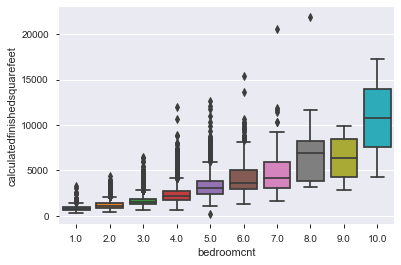

In [37]:
sns.boxplot(x_nums_train.bedroomcnt, x_nums_train.calculatedfinishedsquarefeet)

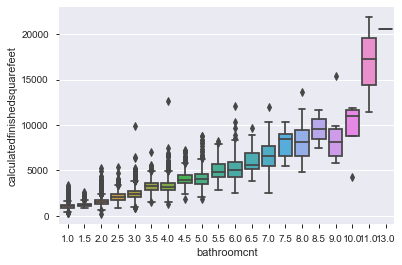

In [38]:
sns.boxplot(x_nums_train.bathroomcnt, x_nums_train.calculatedfinishedsquarefeet)

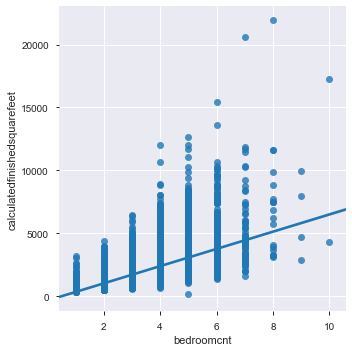

In [39]:
sns.lmplot(data=x_nums_train, y="calculatedfinishedsquarefeet", x="bedroomcnt")

In [40]:
y_nums_train.head().T

,44230,22091,567,25839,3868
logerror,0.02,0.00,0.08,0.31,-0.01


### Model df - Linear Regression Model

In [41]:
# create the LR object

lm1 = LinearRegression()
print(lm1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [42]:
# fit/train the model

model = lm1.fit(x_nums_train, y_nums_train)

In [43]:
# create yhat variable, numpy array, in-sample prediction values

yhat = model.predict(x_nums_train)
type(yhat)
yhat

array([[0.00691426],
       [0.00926487],
       [0.00732561],
       ...,
       [0.01884143],
       [0.01763122],
       [0.02295786]])

In [44]:
# create df, actual in-sample target values

actual = y_nums_train
type(actual)
actual

,logerror
44230,0.02
22091,0.00
567,0.08
25839,0.31
3868,-0.01
22810,-0.08
40528,0.00
11967,0.05
5482,0.04
24338,-0.11


- add yhat as a column to actual predictions df

In [45]:
actual['yhat'] = yhat

### Evaluate LR Model

In [46]:
actual.describe()

,logerror,yhat
count,"36,194.00","36,194.00"
mean,0.02,0.02
std,0.17,0.01
min,-4.45,-0.16
25%,-0.02,0.01
50%,0.01,0.02
75%,0.04,0.02
max,5.26,0.33


In [47]:
actual["residual"] = actual["yhat"] - actual["logerror"]

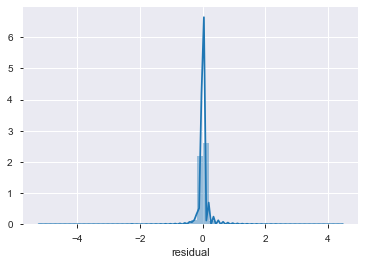

In [48]:
sns.distplot(actual["residual"])

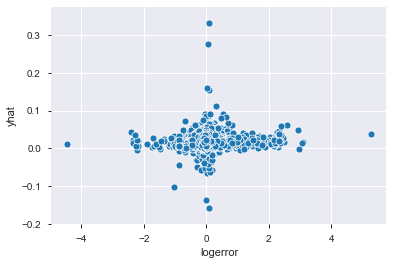

In [49]:
sns.scatterplot(actual["logerror"], actual["yhat"])

In [50]:
actual["residual^2"] = actual["residual"] ** 2

In [51]:
actual.head()

,logerror,yhat,residual,residual^2
44230,0.02,0.01,-0.01,0.00
22091,0.00,0.01,0.01,0.00
567,0.08,0.01,-0.08,0.01
25839,0.31,0.03,-0.28,0.08
3868,-0.01,0.02,0.03,0.00


In [52]:
sse = sum(actual["residual^2"])
print(f"sse = {sse}")
mse = sse / len(actual)
print(f"mse = {mse}")
rmse = sqrt(mse)
print(f"rmse = {rmse}")

sse = 1088.012188085806
mse = 0.03006056772077709
rmse = 0.17337983654617134


In [53]:
df_eval = pd.DataFrame(np.array(["SSE", "MSE", "RMSE"]), columns=["metric"])
df_eval["model_error"] = np.array([sse, mse, rmse])
df_eval

,metric,model_error
0,SSE,"1,088.01"
1,MSE,0.03
2,RMSE,0.17


- Create a numpy array from the y_df_nums_train df, so I can run eval metrics using yhat(prediction array) and y_array (array of actual y values)

In [54]:
y_array = np.array(y_nums_train)
type(y_array)

numpy.ndarray

In [55]:
r2_score(actual.logerror, actual.yhat)

0.0033706328998284185

In [56]:
mse_lm1 = mean_squared_error(actual.logerror, actual.yhat)
print("linear model\n  mean squared error: {:.3}".format(mse_lm1)) 

r2_lm1 = r2_score(actual.logerror, actual.yhat)
print('  {:.2%} of the variance in the logerror can be explained by variables.'.format(r2_lm1))

linear model
  mean squared error: 0.0301
  0.34% of the variance in the logerror can be explained by variables.


### Takeaways from the Linear Regression Model:

- Based on the results above I fail to reject the Null Hypothesis that the numeric values alone can predict the logerror.

- Using a Linear Regression model to predict the logerror may not be the best choice.

- Finding a way to include categorical variables in a model may help predict logerror.

### Model df KNeighbors Regressor